***Запись в журнале: 12:03:45 MET[^1]***

Я в глубокой заднице. Снова.
Как это получилось - меня уже не удивляет.
Но обо всем по порядку.

Минуло уже шесть лет с тех пор, как я в целости покинул Марс. Ну, почти в целости, нервные клетки не считаем. Но это исход, лучше которого и желать не приходится. После моего возвращения я был очень знаменит. И это было...чертовски скучно.

Ну, представьте себе: нескончаемые интервью, вопросы из разряда "А как вы решали проблему с питанием", "Куда вы ходили в туалет", задаваемые снова и снова. В начале мне еще казалось, что я выполняю гражданский долг, популяризирую освоение космоса, помогаю NASA, в общем вся эта брехня, которая звучит убедительно ровно до первого звонка посреди ночи с вопросом, как проходит твой сон после такого длительного нахождения на Марсе. После того как я сменил все телефоны и послал к черту всех журналистов случилось страшное: меня потянуло обратно в космос. Какое-то время я еще мог отделаться от этого желания, проводя инструктаж о том, как не нарваться на разгерметизацию во время ВКД (внекорабельной деятельности), но год назад стало совсем нестерпимо...

Попасть в очередную экспедицию с моими регалиями оказалось довольно просто. Кажется, что на данный момент мое резюме на должность "ботаник-инженер, специалист по Марсу" - самое лучше на любом сайте вакансий (оно же единственное). Ну и опыта у меня прилично...
На волне энтузиазма по поводу моего чудесного спасения для NASA выделили рекордный бюджет и NASA, не будь дураками, запустили пять новых программ. В одной из таких я и решил участвовать.
В чем была идея: пилотируемые стыковки уже давно не новшество. Первая такая стыковка была произведена еще в 70ых, но идея цепочных кораблей пришла в голову инженерам совсем недавно.
Если вкратце, то мощь корабля определяется не только количеством топлива на борту. Есть еще множество различных факторов, но тот, который нам сейчас важен - это его вычислительная мощность. Она нужна не только для каких-то высоколобых задач типа "а что у нас там за черная дыра на расстоянии миллиарда световых лет", но и для вполне насущных - например, как уворачиваться от астероидов в поясе Койпера. Да, пока что пилотируемые аппараты до этого пояса не добирались, но когда-нибудь доберутся ведь?
И вот эту вычислительную мощность можно разбить по отдельным модулям корабля, каждый из которых может отсоединяться от остальных и работать автономно. Маневренность повышается, общая мощность не страдает, задачи можно решать разного плана и т.д. Но есть один маленький нюанс. Как выяснилось, на стыковочном узле немного сэкономили...

Для того чтобы стыковка каждой из частей космического аппарата произошла, нужны действия с каждой из сторон. Как при поцелуе - потянулся один, потянулся другой и вот все произошло. Только вот в нашем страсть была не обоюдной - при расцепке частей корабля и последующей сцепке предпоследний мини-корабль не захотел сливаться воедино с последним. Угадайте, кто был на последнем...

В общем, как и говорил, я в полнейшей заднице.


[^1]: MET - Mission Elapsed Time, время, прошедшее с начала космической миссии в формате дни:часы:минуты

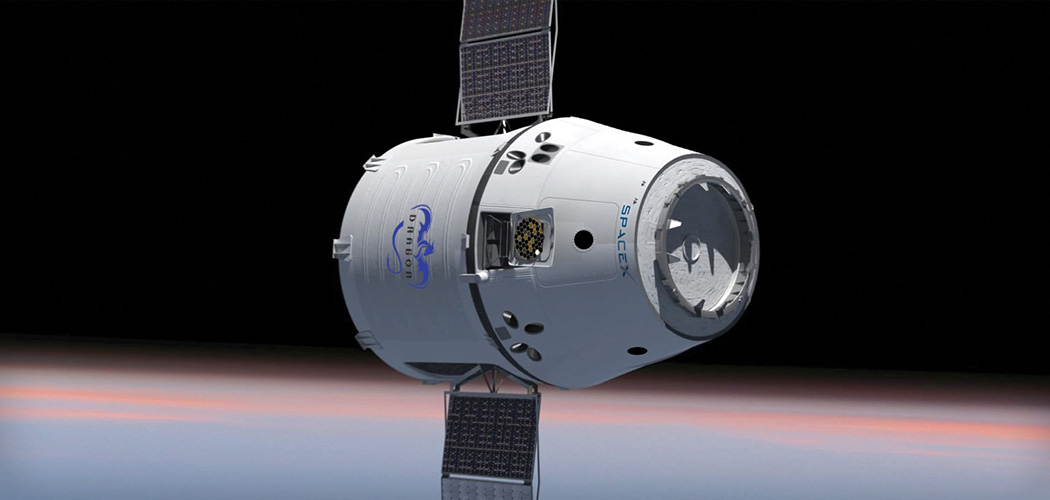

***Запись в журнале: 12:06:45 MET***

Ну что же, решать проблему надо. Связь есть (хорошо), топливо тоже (еще лучше), а вот кислорода хватает впритык (это уже проблема).
Моя единственная надежда - успеть долететь до орбитальной станции быстрее, чем запас кислорода опустится до уровня "хватит на один кислородный коктейль".
Но для этого нужен хороший маршрут...

Вот тут и встает проблема ограниченности ресурсов - никто не ожидал, что кому-то нужно будет перестраивать навигационный режим модуля с ручного на автоматический. Да, такая функция есть, но ее добавили скорее для галочки. Софт, который писали для мини-корабля, изяществом и эффективностью не отличается - пытались выиграть за счет количества модулей, а не за счет их качества.
В нашей миссии ввели еще одно новшество - обновлять код можно "на лету". Обычно софт для космоса пишут на Земле, загружают в память корабля и он там себе спокойно работает. Но не в этот раз. В этот раз решили поэкспериментировать - что, если код смогут редактировать сами астронавты? На Земле мне этот эксперимент показался бредом, но теперь я понимаю - возможно, это то, что спасет мне жизнь...

Итак, мне нужно переписать код, отвечающий за навигацию так, чтобы он ускорился, причем существенно. Бегло просмотрев исходники, я нашел несколько слабых мест в коде. Вот первое из них:

In [ ]:
def avg_direction_angle(start_angle, end_angle):
    avg = 0
    for angle in range(start_angle, end_angle + 1):
        avg += angle
    return avg / (end_angle - start_angle + 1)

Я заметил, что этот вычисление среднего угла направления полета совсем не оптимально. Если бы я был компьютером, я бы воскликнул так:

In [ ]:
def bad_angle():
    #  TODO: напишите сложность алгоритма вместо вопросика, например O(n^2), O(nlogn), O(n), O(1), O(2^n) и т.д. (O - английское)
    return "Посмотрите, да у этого же алгоритма сложность ?"

Хмм, похоже, это среднее арифметическое, а значит можно сделать лучше:

In [ ]:
def avg_direction_angle(start_angle, end_angle):
    # TODO: перепишите код так, чтобы его алгоритмическая сложность улучшилась
    # TODO: если не понимаете, как улучшить, то спросите препода, он подскажет :)
    pass

Еще мне попался код стыковки. Подозреваю, что именно из-за него стыковка и провалилась, он был написан ужасно. Например, там был код траектории сближения (`n_rotation` - это какой на данный момент сейчас поворот):

In [ ]:
def docking_trajectory_path(n_rotation):
    if n_rotation == 1:
        return 1
    if n_rotation == 2:
        return 1
    return docking_trajectory_path(n_rotation - 1) + docking_trajectory_path(n_rotation - 2)

Только представьте себе, насколько это неэффективно!

А если сложно представить - нарисуйте:
- возьмите небольшое число, например, 5
- запустите мысленно этот алгоритм
- на первом же шаге у нас будет развилка - с одной стороны будем вычислять для 4, с другой - для трех
- для них тоже будут свои вызовы, дорисуйте их

Выглядеть будет примерно так:

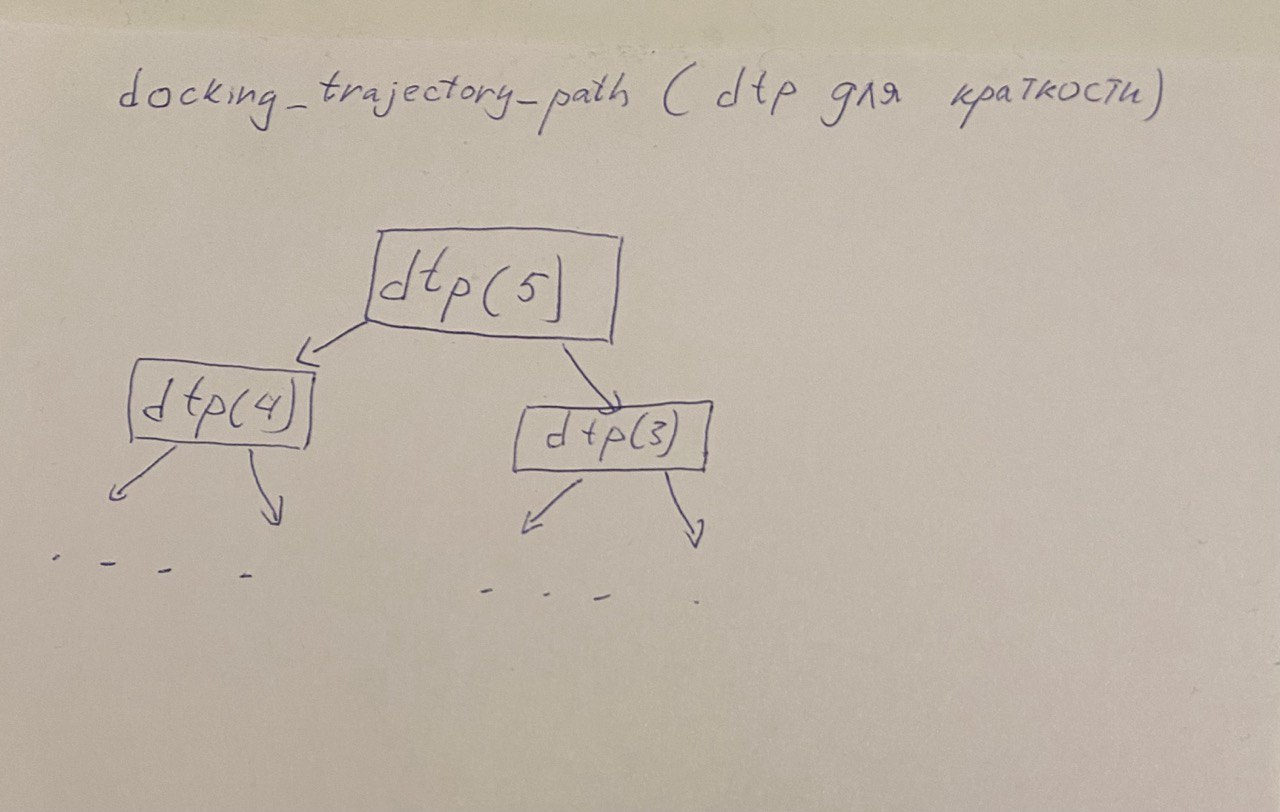

Дальше рисовать я поленился (можете сами нарисовать на досуге). Ну, а теперь, по картинке можно примерно прикинуть сложность:

In [ ]:
def bad_path():
    #  TODO: напишите сложность алгоритма вместо вопросика, например O(n^2), O(nlogn), O(n), O(1), O(2^n) и т.д. (O - английское)
    return "Жесть, алгоритм ?"

Такое точно нужно переписывать! Вот мой шедевр:

In [ ]:
def docking_trajectory_path(n_rotation):
    # TODO: перепишите код так, чтобы его алгоритмическая сложность улучшилась
    # TODO: если не понимаете, как улучшить, то спросите препода, он подскажет :)
    pass

Вот этот код мне тоже показался крайне подозрительным:

In [ ]:
def bin_search_coord(coords, to_find):
        for coord in coords:
            if coord == to_find:
                return True
            if coord > to_find:
                return False
        return None

Вся штука в том, что предварительно координаты сортировались. То есть приходили массивы координат типа `[10.45, 62.0, 100.4]`, ну то есть отстортированные по возрастанию. Недолго думая, я переписал так:

In [ ]:
def bin_search_coord(coords, to_find):
    # TODO: перепишите код так, чтобы его алгоритмическая сложность улучшилась
    # TODO: если не понимаете, как улучшить, то спросите препода, он подскажет :)
    pass

Ну и теперь на компьютерном можно с гордостью сказать:

In [ ]:
def good_search_coord():
    #  TODO: напишите сложность алгоритма вместо вопросика, например O(n^2), O(nlogn), O(n), O(1), O(2^n) и т.д. (O - английское)
    return "Ура, теперь сложность ?"

***Запись в журнале: 12:10:21 MET***

Не заметил, как пролетело 4 часа за работой! Даже за счет этих трех простых оптимизаций траектория полета стала считаться в разы быстрее (я замерял!)
Отметил это событие фирменным блюдом - азу в аллюминиевой банке. Ну да, астронавты тоже иногда могут позволить себе шиковать.
Видимо, азу настолько придало мне сил, что я решил еще раз взглянуть на основную часть исходников моего судна поневоле. Увидел в коде - не поверите - сортировку вставками!

#### Сортировка вставками

Вам нужно написать сортировку вставками, которую увидел наш герой.
Ее алгоритм (сортируем по возрастанию):
- берем очередной элемент из исходного массива
- все элементы слева от него уже стоят на своих местах, мы хотим вставить наш элемент на его место
- в отсортированной части слева ищем подходящую позицию
- вставляем наш элемент на эту позицию, все отсортированные элементы справа от него при этом сдвигаются
- переходим к следующему элементу

Вот гифка, как это работает (на гифке чуть другой алгоритм - они сразу начинают двигать, пока не найдут позицию, куда поставить):


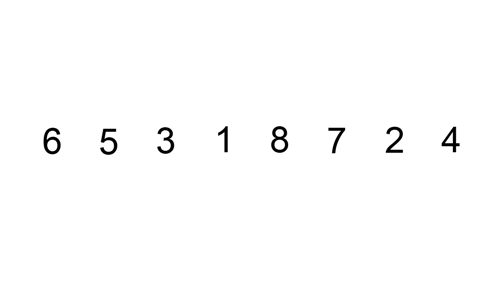

In [ ]:
def isort_coords(coords):
    # TODO: напишите сортировку вставками, которую увидел наш герой
    # Подсказка: чтобы проще было писать можно написать вспомогательную функцию shift(cords, start, end),
    # которая будет двигать все элементы по циклу, например, shift([1 2 3], 0, 2) вернет 3 1 2
    # после этого ее можно будет вызвать внутри isort_coords
    # Подсказка 2: можно написать по алгоритму на гифке, алгоритмическая сложность от этого не изменится, но работать будет чуть быстрее
    pass

Также допишите функцию, которая оценивает сложность данной сортировки:

In [ ]:
def isort_coords_complexity():
    # TODO: напишите сложность алгоритма вместо вопросика, например O(n^2), O(nlogn), O(n), O(1) и т.д. (O - английское)
    return "Эта сортировка работает за ?"

***Запись в журнале: 12:12:21 MET***

Немного поразмыслив, я пришел к выводу, что смогу оптимизировать и эту часть алгоритма. Да, мои знания с курсов алгоритмов немного подзабылись, но вот несколько фактов, которые я еще помню:
1) Любая сортировка случайных данных в худшем случае работает как минимум за O(nlogn)
2) Есть несколько крутых сортировок, которые пихают практически везде (с дополнительными оптимизациями, конечно же)
3) Из крутых и тех, которые я примерно помню, как работают, есть `merge_sort`

Его идея крайне проста. Во-первых, список из одного элемента уже отсортирован. Во-вторых, любой большой список можно разбить на два списка поменьше. Сама собой назревает идея: давайте будет разбивать списки на списки все меньше и меньше, пока в каждом не будет по одному элементу. Ну а потом будем их попарно сливать: например, в первом списке `5`, во втором - `3`, значит общий список будет `[3, 5]`. Не зря этот алгоритм относят к классу алгоритмов "Разделяй и властвуй" - сначала разделили элементы, а потом их объединяем и властвуем.

Я решил начать с середины алгоритма: представим, что у меня уже есть два списка. Каждый из них отсортирован и каждый из них имеет одинаковую длину. Почему? Ну, смотрите: сначала мы сливаем списки длиной 1 (помните про 3 и 5?), потом сливаем списки побольше (наш `[3, 5]` и еще какой-нибудь тоже полученный из маленьких списков, ну, например `[4, 6]`). И так далее, пока все не слили. Получается, у нас происходит следующее:
1) нам дают два списка одинаковой длины (каждый из них отсортирован)
2) нам нужно вернуть результирующий список, составленный из элементов начальных двух

Еще одна идея: мы можем сделать это крайне быстро, если будем записывать, на каком мы сейчас элементе в каждом из массивов. Ну, вот например для `[3, 5]` и `[4, 6]` последовательноость действий будет такая:
- сравниваем нулевые элементы
- тройка меньше, кладем ее в результирующий список, обновляем индекс, отвечающий за позицию в левом списке
- сравниваем 5 (потому что индекс на нее показывает) и 4 (потому что из правого еще ничего не брали). кладем в результат четверку, теперь индекс для правого массива тоже нужно сдвинуть
- сравнили 5 и 6, положили пятерку. теперь дальше идти по спискам смысла нет, но нужно все равно обработать оставшиеся элементы. Можно их добить уже просто посмотрев после цикла, а что у нас там с индексами произошло
Такую функцию я и написал, гордо назвав ее `merge`:

In [ ]:
def merge(arr1, arr2):
    # TODO: напишите слияние двух уже отсортированных массивов, как описал это наш герой
    # не забудьте в конце вернуть результирующий список из функции!
    # внимание! здесь НЕ нужно использовать isort, который писали ранее
    pass

Ну, теперь дело за малым: нам нужно разбивать наш большой список до тех пор, пока он не станет набором одноэлементных списов. Да, есть еще подстава со списками нечетной длины, но я решил подумать об этом позже.
Итак, вот, например, у меня список `[6, 4]`. Что делаем? Ну, ясно что:
- делим список пополам
- сливаем половинки
- получаем отсортированный список

А если список больше. Ну, например `[3, 5, 4, 6]`? Тут все как в анекдоте про математика и чайник (поищите в интернете, если не знаете):
- делим список пополам
- сводим задачу к предыдущей

Кажется, все в этом алгоритме так и кричит слово "рекурсия"! Получается так:
- если список длины 1, то вернем его как он есть
- если список большей длины, то вызываем на его половинках нашу функцию
- мы знаем, что функция после вызова вернет отсортированный список. то есть просто берем результат после вызова функции для левой части и результат для правой. ну и пользуемся нашей непревзойденной функцей `merge` (сам писал!)
- слияние получили, его и вернем

Написал, решил придумать невнятное название как в оригинале. Получил `msort_coords`:

In [ ]:
def msort_coords(coords):
    # TODO: напишите функцию msort_coords по тому алгоритму, как описывает наш герой
    pass

Ну а потом еще и случай для списков нечетной длины починил!

In [ ]:
# TODO: почините алгоритм для случая, когда длина списка нечетная. как именно - на ваше усмотрение
# можно поменять что-то в msort_coords или в merge

Ну и, момент истины! А улучшил ли я хоть что-то? Для этого можно провести максимально тупую проверку:
- генерируем громадный список со случайными числами
- вызываем обе функции и замеряем, сколько времени каждая из них будет сортировать

Попробуем:

In [ ]:
import time
import random
import sys

def measure_time(alg):
    arr = [random.randint(-sys.maxsize - 1, sys.maxsize) for _ in range(5000)]
    tmp = arr.copy()
    start = time.time()
    for _ in range(100):
        alg(arr)
        arr = tmp
    end = time.time()
    return end - start

In [ ]:
print (f"Сортировка вставками заняла {measure_time(isort_coords)} s")

Сортировка вставками заняла 0.0 s


In [ ]:
print(f"Cортировка слиянием заняла {measure_time(msort_coords)} s")

Cортировка слиянием заняла 0.0 s


Ура, большая часть плохих алгоритмов побеждена! Теперь остается только откинуться на спинку кресла и наслаждаться полетом!

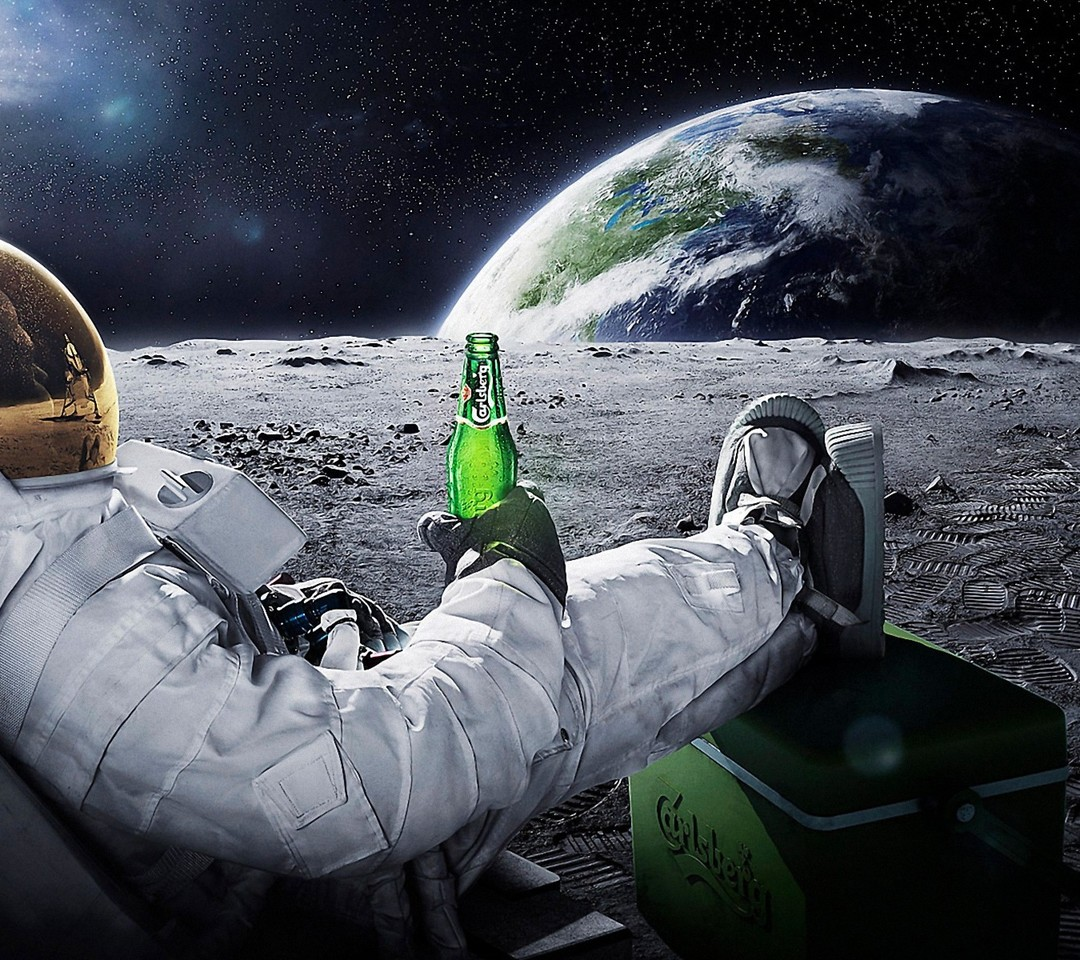